In [1]:
def DH(a, d, α, θ):
    from sympy import Matrix, sin, cos
    A = Matrix([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
                [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
                [0, sin(α), cos(α), d],
                [0, 0, 0, 1]])
    return A

In [13]:
from sympy import pi, var, trigsimp
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()
var("l1:8")
var("q1:8")

In [3]:
DH(0, 1, pi/2, 0)

matrix([[ 1.000000e+00, -0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  1.000000e+00,  6.123234e-17,  1.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [6]:
A1 = DH(0, l1+l2, -pi/2, q1)
A2 = DH(0, 0,      pi/2, q2)
A3 = DH(0, l3+l4, -pi/2, q3)
A4 = DH(0, 0,      pi/2, q4)
A5 = DH(0, l5+l6, -pi/2, q5)
A6 = DH(0, 0,      pi/2, q6)
A7 = DH(0, l7,    -pi/2, q7)

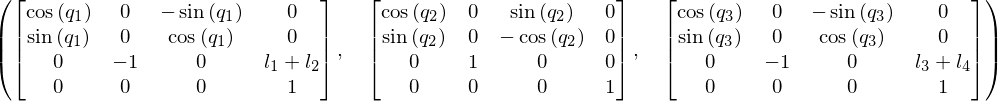

In [8]:
A1, A2, A3

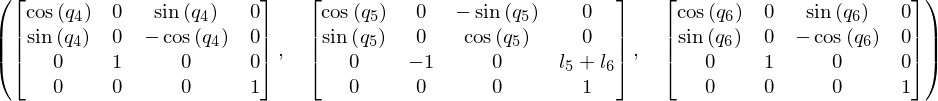

In [9]:
A4, A5, A6

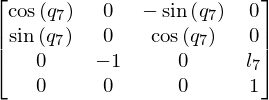

In [10]:
A7

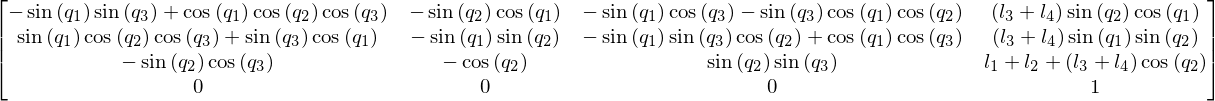

In [19]:
A1*A2*A3

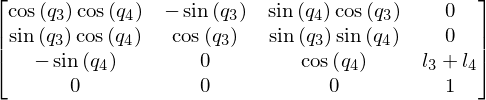

In [21]:
trigsimp(A3*A4)

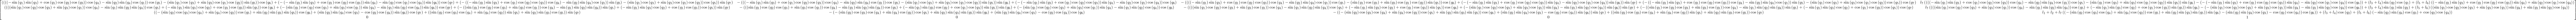

In [15]:
trigsimp(A1*A2*A3*A4*A5*A6*A7)

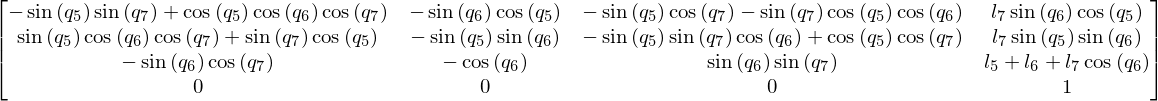

In [22]:
A5*A6*A7

In [94]:
def cinematica_LBR(q1, q2, q3, q4, q5, q6, q7):
    # Considere que las longitudes son todas iguales a 1
    l1, l7 = 0.2, 0.2
    l2, l3, l4, l5, l6 = 0.15, 0.15, 0.15, 0.15, 0.15
    from numpy import pi
    A1 = DH(0, l1+l2, -pi/2, q1)
    A2 = DH(0, 0,      pi/2, q2)
    A3 = DH(0, l3+l4, -pi/2, q3)
    A4 = DH(0, 0,      pi/2, q4)
    A5 = DH(0, l5+l6, -pi/2, q5)
    A6 = DH(0, 0,      pi/2, q6)
    A7 = DH(0, l7,    -pi/2, q7)

    return A1, A2, A3, A4, A5, A6, A7

In [95]:
cinematica_LBR(0,0,0,0,0,0,0)

(matrix([[ 1.000000e+00, -0.000000e+00, -0.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  6.123234e-17,  1.000000e+00,  0.000000e+00],
         [ 0.000000e+00, -1.000000e+00,  6.123234e-17,  3.500000e-01],
         [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]),
 matrix([[ 1.000000e+00, -0.000000e+00,  0.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  1.000000e+00,  6.123234e-17,  0.000000e+00],
         [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]),
 matrix([[ 1.000000e+00, -0.000000e+00, -0.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  6.123234e-17,  1.000000e+00,  0.000000e+00],
         [ 0.000000e+00, -1.000000e+00,  6.123234e-17,  3.000000e-01],
         [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]),
 matrix([[ 1.000000e+00, -0.000000e+00,  0.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],


In [96]:
%matplotlib inline
from matplotlib.pyplot import figure, plot, style
from mpl_toolkits.mplot3d import Axes3D
style.use("ggplot")
from ipywidgets import interact
from numpy import pi
τ = 2*pi

In [97]:
def grafica_LBR(q1, q2, q3, q4, q5, q6, q7):
    from numpy import matrix
    
    o0 = matrix([[0], [0], [0], [1]])
    
    A1, A2, A3, A4, A5, A6, A7 = cinematica_LBR(q1, q2, q3, q4, q5, q6, q7)
    
    # Se calculas las trasnformaciones H1 y H2
    H1 = A1
    H2 = A1*A2
    H3 = A1*A2*A3
    H4 = A1*A2*A3*A4
    H5 = A1*A2*A3*A4*A5
    H6 = A1*A2*A3*A4*A5*A6
    H7 = A1*A2*A3*A4*A5*A6*A7
    
    # Se calcula la cinematica directa
    o1 = H1*o0
    o2 = H2*o0
    o3 = H3*o0
    o4 = H4*o0
    o5 = H5*o0
    o6 = H6*o0
    o7 = H7*o0
    
    # Define arreglos con las coordenadas x, y, y z de cada punto
    xs = [o0.item(0), o1.item(0), o2.item(0), o3.item(0), o4.item(0), o5.item(0), o6.item(0), o7.item(0)]
    ys = [o0.item(1), o1.item(1), o2.item(1), o3.item(1), o4.item(1), o5.item(1), o6.item(1), o7.item(1)]
    zs = [o0.item(2), o1.item(2), o2.item(2), o3.item(2), o4.item(2), o5.item(2), o6.item(2), o7.item(2)]
    
    fig = figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(xs, ys, zs, "-o")
    
    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-0.6, 0.6)
    ax.set_zlim(-0.1, 1.1)
    return ax

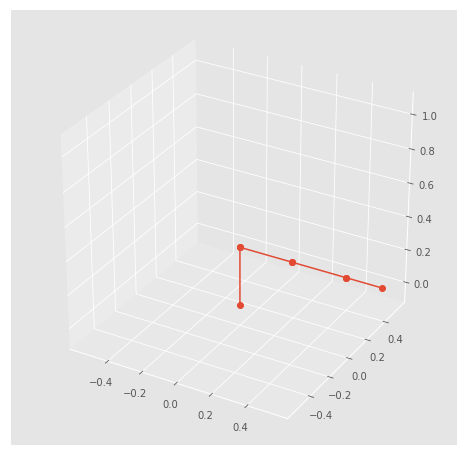

In [98]:
grafica_LBR(0,pi/2,0,0,0,0,0)

In [99]:
interact(grafica_LBR, q1=(-τ/4, τ/4), q2=(-τ/4, τ/4), q3=(-τ/4, τ/4), q4=(-τ/4, τ/4), q5=(-τ/4, τ/4), q6=(-τ/4, τ/4), q7=(-τ/4, τ/4))

interactive(children=(FloatSlider(value=0.0, description='q1', max=1.5707963267948966, min=-1.5707963267948966…

<function __main__.grafica_LBR(q1, q2, q3, q4, q5, q6, q7)>

In [24]:
from numpy import sin, cos, radians

In [26]:
0.15*sin(radians(40))*sin(radians(50))

In [27]:
0.2 + 0.2 + 0.15*cos(radians(50))